### Importing packages

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

### Reading csv file

In [4]:
nba = pd.read_csv('./nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


### Obtaining 2010 Season data

In [5]:
# Subset Data to 2010 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


### Obtaining 2014 Season data

In [6]:
# Subset Data to 2014 Season
nba_2014 = nba[nba.year_id == 2014]
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


### Obtaining Knicks 2010 Season data

In [7]:
knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
knicks_pts.head()

21719     93
21725    100
21728    127
21734    117
21739     89
Name: pts, dtype: int64

### Obtaining Nets 2010 Season data

In [8]:
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']
nets_pts.head()

21720     93
21727     85
21730    104
21733     68
21738     94
Name: pts, dtype: int64

### Average Knicks points 2010 Season

In [10]:
knicks_pts_mean = np.mean(knicks_pts)
knicks_pts_mean

102.10975609756098

### Average Nets points 2010 Season

In [11]:
nets_pts_mean = np.mean(nets_pts)
nets_pts_mean

92.3780487804878

### Difference in average points between Knicks and Nets 2010 Season

In [12]:
diff_means_2010 = knicks_pts_mean - nets_pts_mean
diff_means_2010

9.731707317073173

### Histogram Distribution of Points of Knicks and Nets 2010 Season

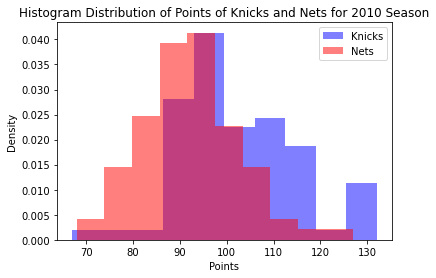

<Figure size 432x288 with 0 Axes>

In [36]:
plt.hist(knicks_pts, color = 'Blue', density = True, label = 'Knicks', alpha = 0.5)
plt.hist(nets_pts, color = 'Red', density = True, label = 'Nets', alpha = 0.5)
plt.title('Histogram Distribution of Points of Knicks and Nets for 2010 Season')
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.clf()

### Obtaining Knicks 2014 Season data

In [29]:
knicks_pts_2014 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
knicks_pts_2014.head()

23469     90
23473     81
23480    100
23486     97
23490    101
Name: pts, dtype: int64

### Obtaining Nets 2014 Season data

In [30]:
nets_pts_2014 = nba_2014.pts[nba_2014.fran_id == 'Nets']
nets_pts_2014.head()

23468     94
23475    101
23482     86
23484    104
23494    108
Name: pts, dtype: int64

### Average Knicks points 2014 Season

In [37]:
knicks_pts_mean_2014 = np.mean(knicks_pts_2014)
knicks_pts_mean_2014

98.58536585365853

### Average Nets points 2014 Season

In [38]:
nets_pts_mean_2014 = np.mean(nets_pts_2014)
nets_pts_mean_2014

98.13829787234043

### Difference in average points between Knicks and Nets 2014 Season

In [39]:
diff_means_2014 = knicks_pts_mean_2014 - nets_pts_mean_2014
diff_means_2014

0.44706798131809933

### Histogram Distribution of Points of Knicks and Nets

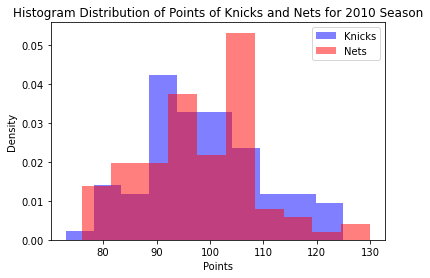

In [35]:
plt.hist(knicks_pts_2014, color = 'Blue', label = 'Knicks', density = True, alpha = 0.5)
plt.hist(nets_pts_2014, color = 'Red', label = 'Nets', density = True, alpha = 0.5)
plt.title('Histogram Distribution of Points of Knicks and Nets for 2014 Season')
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend()
plt.show()

### Boxplot of Points of Different Teams in 2010 Season

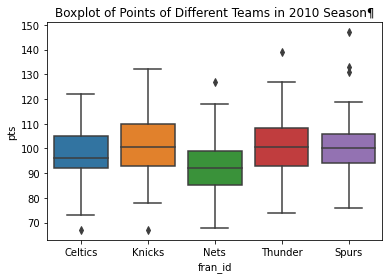

In [40]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.title('Boxplot of Points of Different Teams in 2010 Season¶')
plt.show()

### Crosstab of Game Outcome against Location

In [20]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


### Table of Proportions of Game Outcome against Location

In [21]:
location_result_proportions = location_result_freq / len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


### Chi2 Determination for Association Checking

In [22]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(np.round(expected))
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


### Covariance between Game Forecast and Points Difference

In [23]:
covariance = np.cov(nba_2010.forecast, nba_2010.point_diff)
covariance

array([[  0.05,   1.37],
       [  1.37, 186.56]])

### Corelation between Game Forecast and Points Difference

In [24]:
corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
corr

0.44020887084680815

### Scatter Plot of Points Difference against Forecasted Probabilities

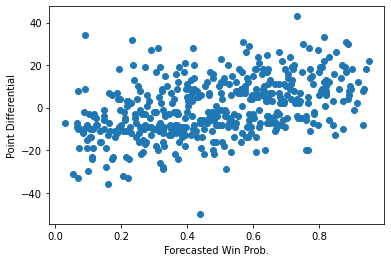

In [25]:
plt.scatter(nba_2010.forecast, nba_2010.point_diff)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()